<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

## Load and Prepare Data

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# Find the mode of month in data
Rating_mode = df.Rating.mode()[0]

# Fill the missing values with mode value of month in data.
df.Rating.fillna(Rating_mode, inplace = True)

# Let's see the null values in the month column.
df.Rating.isnull().sum()

0

## Data Preprocessing

In [7]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [8]:
df.columns=[each.replace(" ","_") for each in df.columns]
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
df["Category"]=[each.replace("_"," ") for each in df.Category]
df["Price"]=[str(each.replace("$","")) for each in df.Price]

df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Rating = pd.to_numeric(df.Rating, errors='coerce')

In [10]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Strorytelling - Visualization

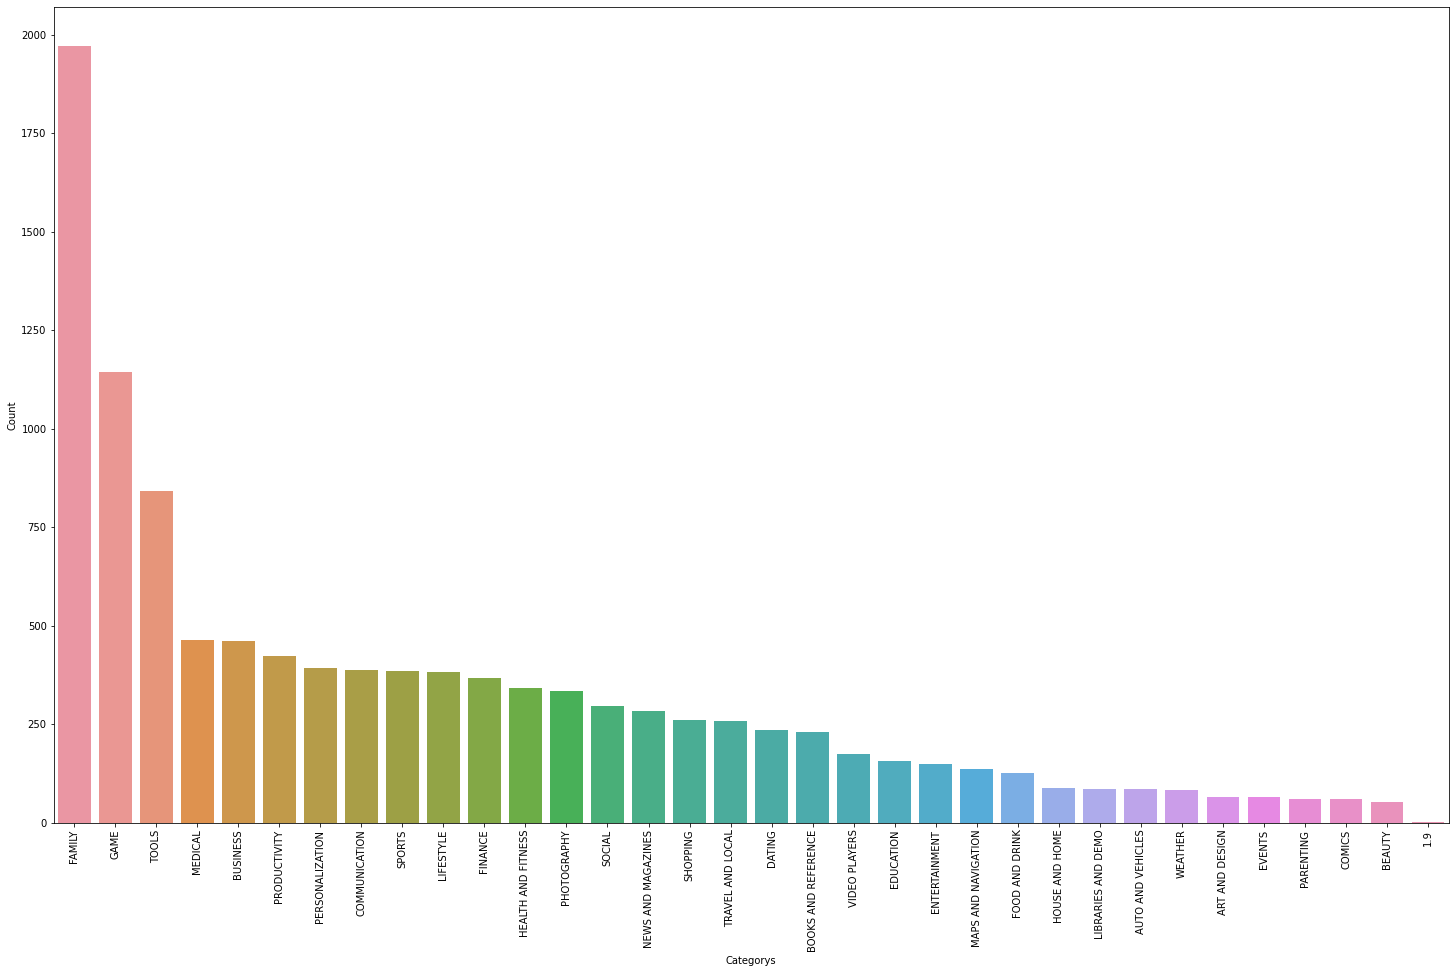

In [11]:
# Bar Plot

df2 = pd.DataFrame(columns = ['Category'])
df2["Category"]=[each for each in df.Category.unique()]
df2["Count"]=[len(df[df.Category==each]) for each in df2.Category]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Category, y=df2.Count)
plt.xticks(rotation= 90)
plt.xlabel('Categorys')
plt.ylabel('Count')
plt.show()

In [12]:
labels = df.Android_Ver.unique()
values=[]
for each in labels:
    values.append(len(df[df.Android_Ver==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.9)])
fig.show()

In [13]:
# Box Plot

Category1 = df[df.Category=="GAME"].Rating
Category2 = df[df.Category=="FAMILY"].Rating
Category3 = df[df.Category=="MEDICAL"].Rating

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='MEDICAL'))

fig.show()



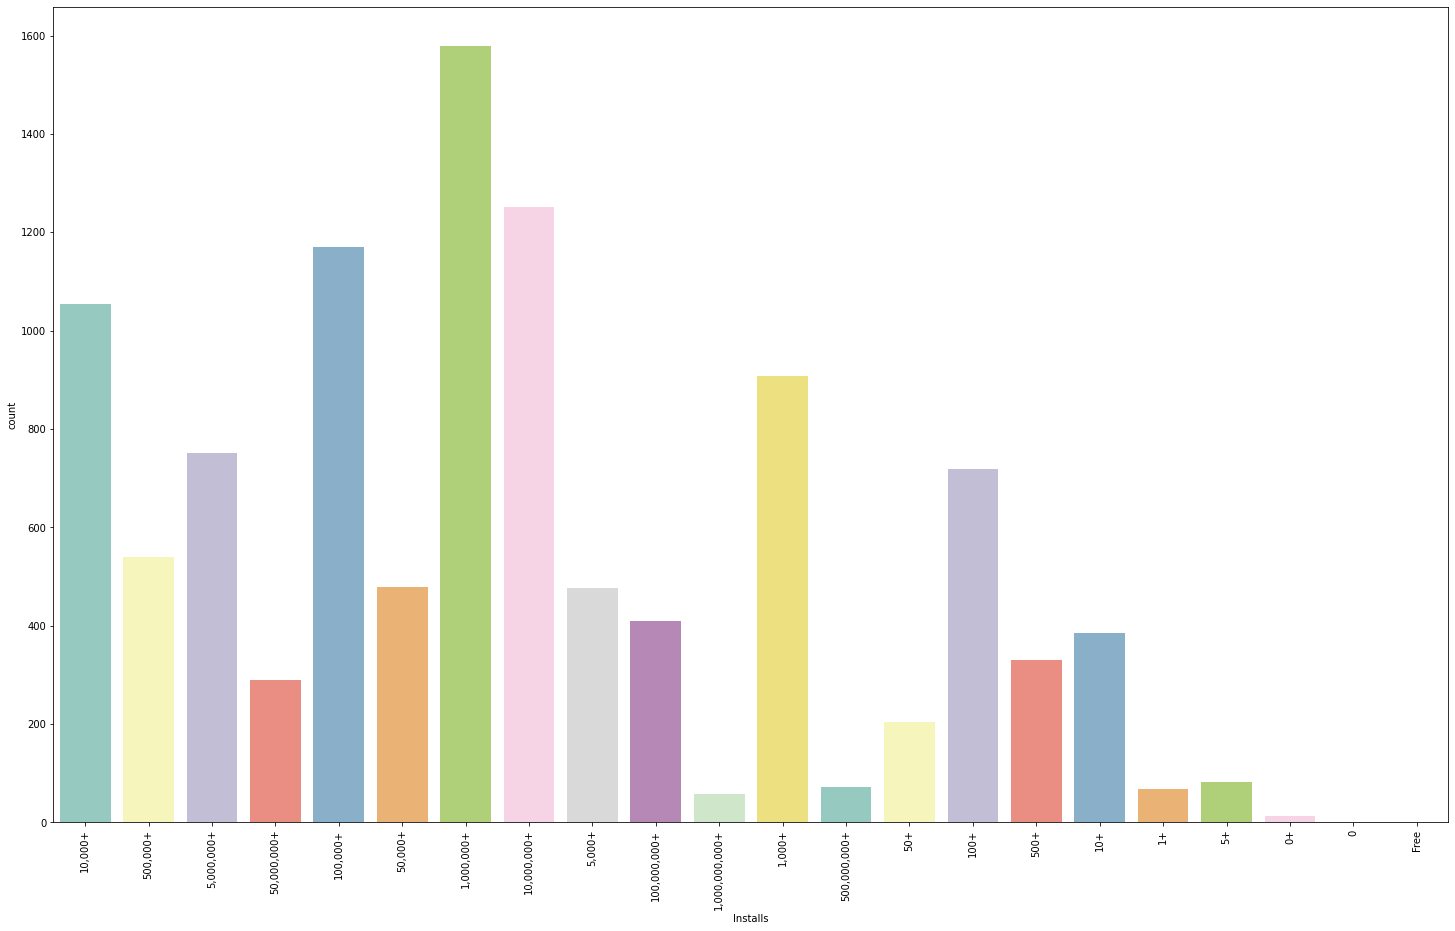

In [14]:
# Count Bar

plt.subplots(figsize=(25,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=df, palette="Set3")



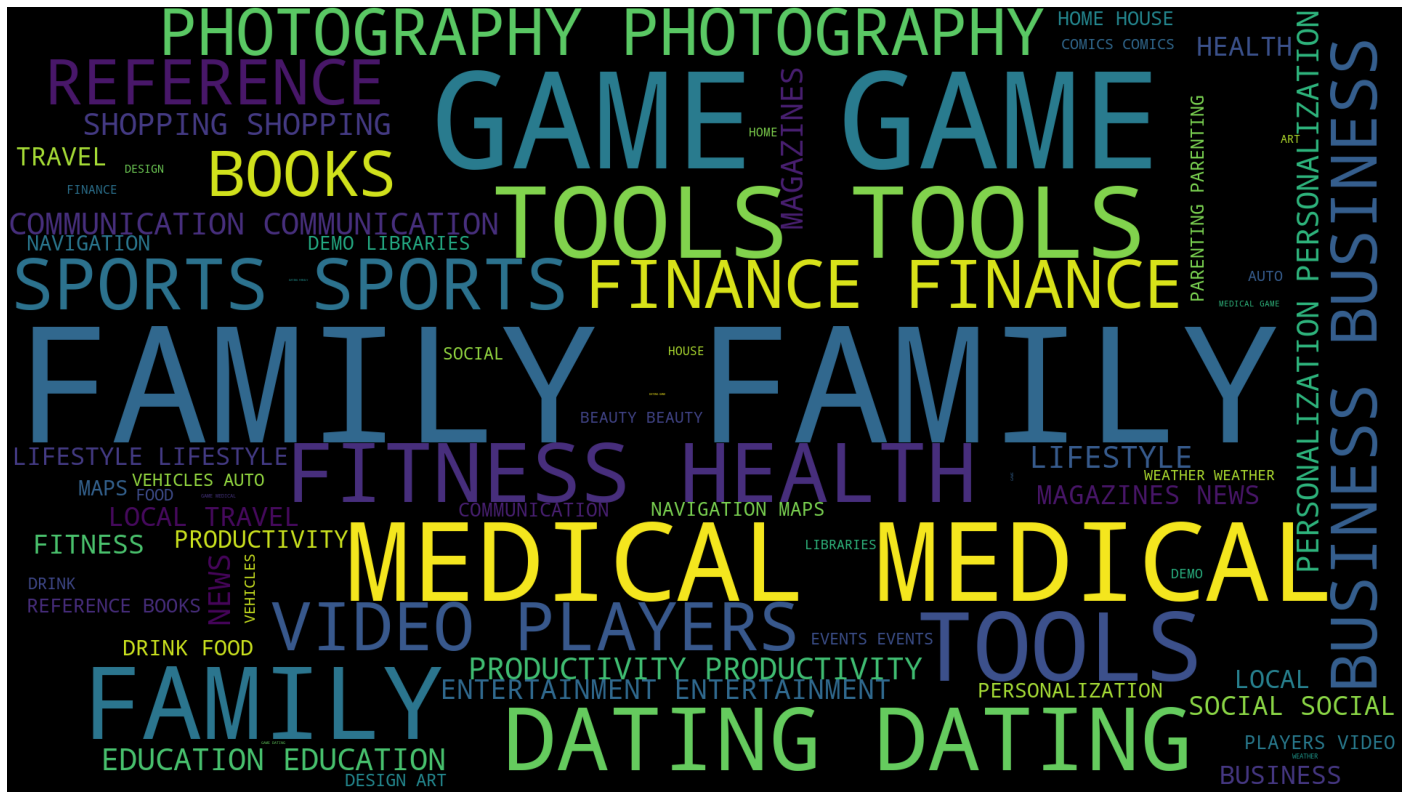

In [15]:
# Word Cloud Plot

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## Send us the Result (Maktabkhoone)